<a href="https://colab.research.google.com/github/jblss888/cs39aa_project/blob/main/project_part2_Juliet_Smith.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Part 2, Juliet Smith


In [2]:
#Installations

!pip install datasets
!pip install nltk 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 5.1 MB/s 
     |████████████████████████████████| 182 kB 56.8 MB/s 
     |████████████████████████████████| 212 kB 51.5 MB/s 
     |████████████████████████████████| 115 kB 56.8 MB/s 
     |████████████████████████████████| 127 kB 67.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd # this is the tool I will use to inteact with the dataset
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split

from datasets import load_dataset # this will let me load the dataset "LiMit" from Hugging Face

import nltk # This will help me break up sentences into individual words
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [4]:
# Loaing "LiMiT" dataset from hugging face
dataset = load_dataset("limit")

Generating train split:   0%|          | 0/23559 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset limit downloaded and prepared to /root/.cache/huggingface/datasets/limit/default/1.0.0/6319c49a88c20afbe30e3479adf2b0904cfb0a8244b435d8d18f894f485636e6. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

This redoes most of what I had done from project_1. 

Just as a reminder. This dataset is already split into training and validation datasets. I will mark them as train and val. Each of them will go through the same clean up process but I will only describe the training dataset.

In [5]:
#This will convert the the hugging face dataset framework into a panda's dataset framework
#This dataset already has a set of test data so I don't need to set aside a portion of the training data. 

train = pd.DataFrame(dataset['train'])
val = pd.DataFrame(dataset['test'])

from nltk.tokenize import word_tokenize #This is the specific tokenizer I am going to use. 
train['tokens_raw'] = train['sentence'].apply(lambda x: word_tokenize(x.lower()))
val['tokens_raw'] = train['sentence'].apply(lambda x: word_tokenize(x.lower()))
train['word_count'] = train['tokens_raw'].apply(lambda x: len(x))
val['word_count'] = train['tokens_raw'].apply(lambda x: len(x))
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
#train['tokens'] = train['tokens_raw'].apply(lambda x: [lemmatizer.lemmatize(w, pos="v") for w in x])
train['tokens'] = train['tokens_raw'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])
val['tokens'] = train['tokens_raw'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])

train.head(10)


,id,sentence,motion,motion_entities,tokens_raw,word_count,tokens
0,0,A little boy holding a yellow ball walks by.,yes,"[{'entity': 'little boy', 'start_index': 2}, {...","[a, little, boy, holding, a, yellow, ball, wal...",10,"[a, little, boy, holding, a, yellow, ball, wal..."
1,1,The camel walks as the woman leans forward.,yes,"[{'entity': 'camel', 'start_index': 4}, {'enti...","[the, camel, walks, as, the, woman, leans, for...",9,"[the, camel, walk, a, the, woman, lean, forwar..."
2,2,The man mixes up various ingredients and begi...,yes,"[{'entity': 'man', 'start_index': 4}, {'entity...","[the, man, mixes, up, various, ingredients, an...",14,"[the, man, mix, up, various, ingredient, and, ..."
3,3,He continues laying tiles on the floor while ...,yes,"[{'entity': 'He', 'start_index': 0}, {'entity'...","[he, continues, laying, tiles, on, the, floor,...",16,"[he, continues, laying, tile, on, the, floor, ..."
4,4,Then one man stands in a field holding a woode...,yes,"[{'entity': 'man', 'start_index': 9}, {'entity...","[then, one, man, stands, in, a, field, holding...",16,"[then, one, man, stand, in, a, field, holding,..."
5,5,He then bends down and grabs a ball.,yes,"[{'entity': 'He', 'start_index': 0}, {'entity'...","[he, then, bends, down, and, grabs, a, ball, .]",9,"[he, then, bend, down, and, grab, a, ball, .]"
6,6,"After,the ball is placed on the ground and he ...",yes,"[{'entity': 'he', 'start_index': 43}, {'entity...","[after, ,, the, ball, is, placed, on, the, gro...",24,"[after, ,, the, ball, is, placed, on, the, gro..."
7,7,"After,everyone is pictured lying down on the g...",yes,"[{'entity': 'person', 'start_index': 80}, {'en...","[after, ,, everyone, is, pictured, lying, down...",36,"[after, ,, everyone, is, pictured, lying, down..."
8,8,"She lays out wrapping paper, showing how to w...",yes,"[{'entity': 'She', 'start_index': 0}, {'entity...","[she, lays, out, wrapping, paper, ,, showing, ...",15,"[she, lay, out, wrapping, paper, ,, showing, h..."
9,9,"She wraps it around the toy, then tapes it up.",yes,"[{'entity': 'She', 'start_index': 0}, {'entity...","[she, wraps, it, around, the, toy, ,, then, ta...",12,"[she, wrap, it, around, the, toy, ,, then, tap..."


In [6]:
train["motion"].describe()


count     23559
unique        2
top         yes
freq      14660
Name: motion, dtype: object

In [7]:
train["sentence"].describe()

count                                             23559
unique                                            23559
top        A little boy holding a yellow ball walks by.
freq                                                  1
Name: sentence, dtype: object

In [8]:
train["tokens_raw"].describe()

count                                     23559
unique                                    23553
top       [a, woman, talks, to, the, camera, .]
freq                                          2
Name: tokens_raw, dtype: object

In [9]:
train["tokens"].describe()

count                                    23559
unique                                   23553
top       [a, woman, talk, to, the, camera, .]
freq                                         2
Name: tokens, dtype: object

In [10]:
#Create vocabulary of words that are model will know.
def create_vocab_list(tokens_column):
    vocab = dict()
    for tweet_tokens in tokens_column:
        for token in tweet_tokens:
            if token not in vocab:
                vocab[token] = 1
            else:
                vocab[token] += 1
    return vocab
#This will look at the tokens created by the lemmanizer.
vocab_all = dict(sorted(create_vocab_list(train['tokens']).items(), key=lambda item: item[1], reverse=True))
print(f"number of unique tokens overall: {len(vocab_all)}")

number of unique tokens overall: 23269


In [11]:
list(vocab_all.items())[:20]

[('the', 33750),
 (',', 24781),
 ('.', 22916),
 ('a', 19421),
 ('and', 17496),
 ('of', 10733),
 ('to', 10695),
 ('in', 7778),
 ('he', 6392),
 ('his', 5663),
 ('on', 5127),
 ('with', 4702),
 ('it', 4080),
 ('wa', 4007),
 ('her', 3727),
 ('that', 3183),
 ('is', 3104),
 ('i', 3072),
 ('she', 3043),
 ('man', 3031)]

**Now to start training the model!**

In [12]:
X_train_raw = train["sentence"].copy()
y_train = train["motion"].copy()

X_val_raw = val["sentence"].copy()
y_val = val["motion"].copy()

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
#import seaborn as sns
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(X_train_raw).toarray()
print(f"X_train.shape = {X_train.shape}")
type(X_train)

X_train.shape = (23559, 24314)


numpy.ndarray

accuracy (on X_train): 1.0000


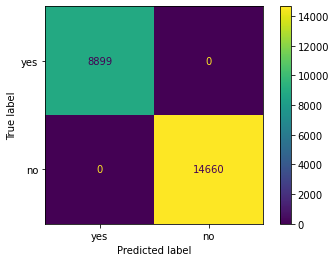

In [14]:
model = RandomForestClassifier()

model = model.fit(X_train, y_train)

predictions_train = model.predict(X_train)

disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=['yes', 'no'])
disp.plot()
print(f"accuracy (on X_train): {accuracy_score(y_train, predictions_train):.4f}")

In [15]:
X_val = tfidf_vectorizer.transform(X_val_raw).toarray()
print(f"X_val.shape = {X_val.shape}")
type(X_val)

X_val.shape = (1000, 24314)


numpy.ndarray

accuracy (on X_train): 0.7180


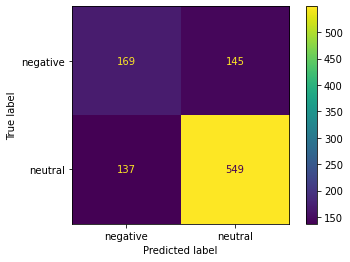

In [16]:
predictions_val = model.predict(X_val)
disp = ConfusionMatrixDisplay(confusion_matrix(y_val, predictions_val), display_labels=['negative', 'neutral', 'positive'])
disp.plot()
print(f"accuracy (on X_train): {accuracy_score(y_val, predictions_val):.4f}")

This is the first run of my data. While these are very good results for doing a simple radom forest, my model is over fitting.